In [1]:
import pandas as pd
df_matrix = pd.read_csv('matrix.csv',index_col=0)
smarts_list = list(df_matrix.columns)
import pandas as pd
from rdkit import Chem
def smart_to_smiles(s):
    mol = Chem.MolFromSmarts(s)
    if mol is None:
        mol = Chem.MolFromSmiles(s)
    return Chem.MolToSmiles(mol, canonical=True) if mol else None
smi_list = []
for s in smarts_list:

    smi = smart_to_smiles(s)
    print(smi)
    smi_list.append(smi)
df_matrix.columns = smi_list

C:C:C(Cl):C:C
C1:C:C:C:C:C:1
C:C:C(Cl):C(:C)C
NC1:C:C:C:C:C:1
CC1:C:C:C(O):C:C:1
CCOC1:C:C:C:C:C:1
CC1:C:C:C(F):C:C:1
C:C(:C)C1:C:C:C(C):C:C:1
COC1:C:C:C:C:C:1O
COC(F)(F)F
C:C(:C)C1:C:C:C(F):C:C:1
CC1:C:C:C:C(O):C:1
C:C1:C:C:C:C:C:1
C:C(:C)OC
C:C:C(Cl):C(:C)N
C:C(:C)C1:C:C:C(O):C:C:1
C:C(:C)C(N)=O
C:C:C(F):C(:C)F
C:C(:C)CN1CCNCC1
CC1:C:C:C(C(N)=O):C:C:1
C:C:C(:C:C)NC(:N:C):N:C
C:C(:C)N1CCN(C)CC1
CN1CCCC1
FC1:C:C:C:C:C:1
OC1:C:C:C:C:C:1
COC1:C:C:C:C:C:1
COC1:C:C:C:C:C:1C
CC1:C:C:C:C:C:1


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap(P, Mlist, mat, out_png, cmap="magma", zero_as_white=True, reverse=False):
    """
    绘制热图（SMARTS 在纵轴，Protein 在横轴）
    - cmap: 颜色映射名
    - zero_as_white: True 时把 <=0 的格子显示为白色
    - reverse: True 使用反转色带
    """
     # ===== 先重排列顺序 =====
    nonzero_counts = np.count_nonzero(mat, axis=0)   # 每一列的非零个数
    order = np.argsort(-nonzero_counts)              # 从大到小排序
    mat = mat[:, order]
    Mlist = [Mlist[i] for i in order]                        # 重排 Protein 顺序
    # 上限用 95 分位，避免极端值拉伸
    vmax = np.percentile(mat[mat > 0], 95) if np.any(mat > 0) else None

    # 0 值置白：用掩膜
    data = np.ma.masked_where(mat <= 0, mat) if zero_as_white else mat

    # 取色带
    cmap_name = f"{cmap}_r" if reverse else cmap
    cmap_obj = plt.get_cmap(cmap_name)
    if zero_as_white:
        try:
            cmap_obj = cmap_obj.with_extremes(bad="#FFFFFF")
        except Exception:
            try:
                cmap_obj.set_bad("#FFFFFF")
            except Exception:
                pass

    # 画图：调换行列 -> mat.T
    plt.figure(figsize=(max(8, 0.20*len(P)+3), max(6, 0.18*len(Mlist)+3)))
    im = plt.imshow(
        data.T, aspect="auto", interpolation="nearest",
        cmap=cmap_obj, vmin=0 if zero_as_white else 0, vmax=0.9
    )

    # 横轴 = Protein
    plt.xticks(ticks=np.arange(len(P)), labels=[str(x) for x in P], rotation=90, fontsize=10)
    # 纵轴 = SMARTS
    plt.yticks(ticks=np.arange(len(Mlist)), labels=[str(x) for x in Mlist], fontsize=10)

    plt.xlabel("Protein")
    plt.ylabel("SMARTS (selected)")
    plt.title("Signal percentile heatmap (per protein)")

    cb = plt.colorbar(im)
    cb.set_label("signal_pct (0~1)")

    plt.tight_layout()
    # plt.savefig(out_png, dpi=300, bbox_inches="tight")
    plt.show()
    return pd.DataFrame(mat,index=P,columns=Mlist)

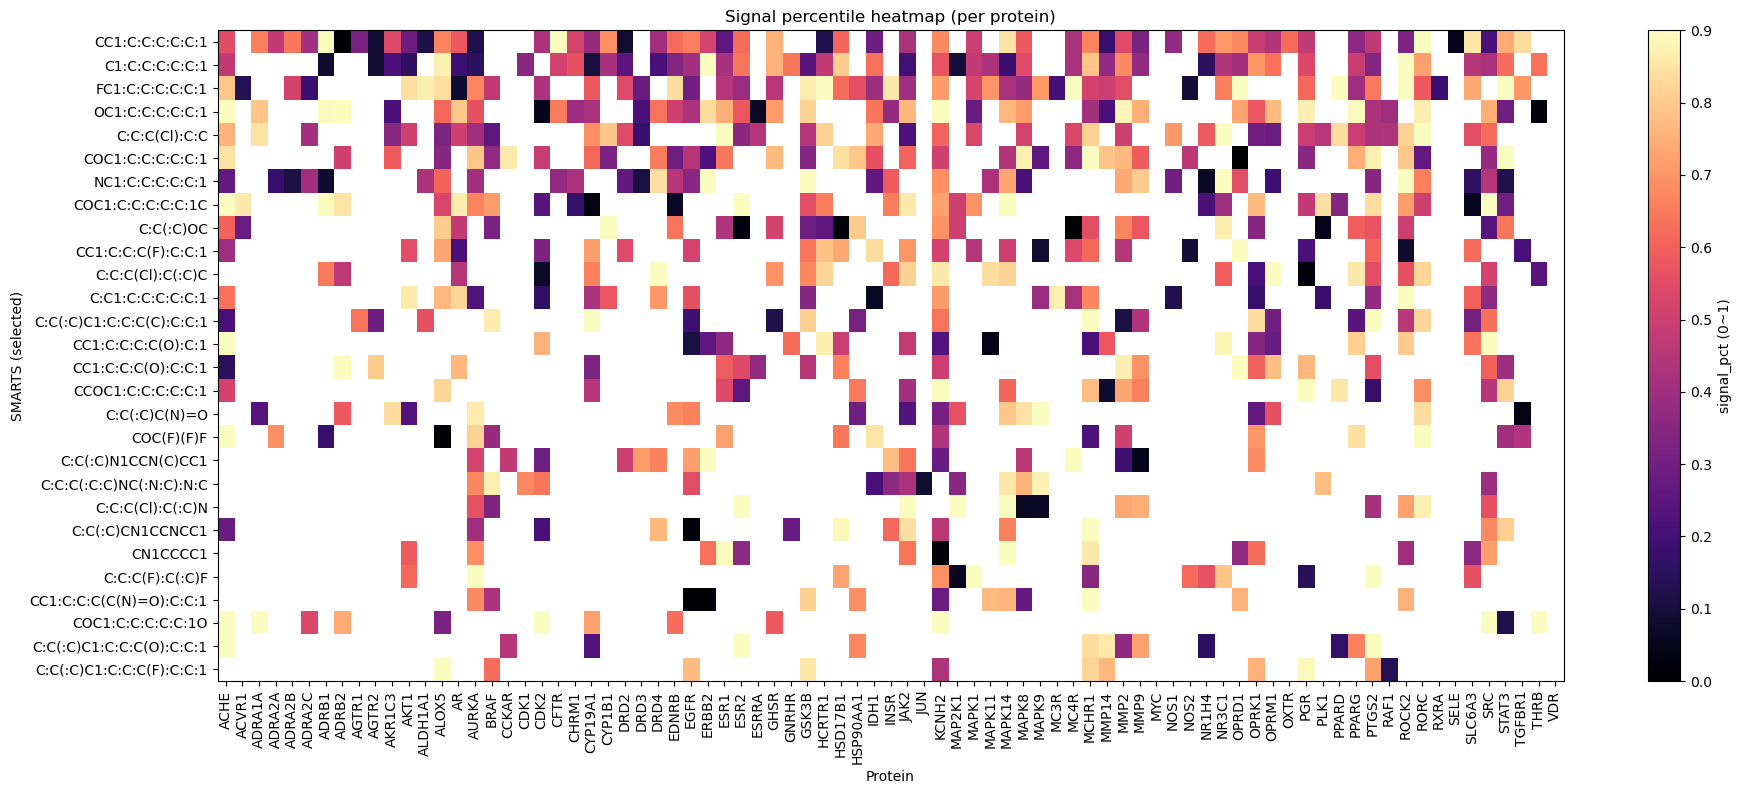

In [3]:
df_new = plot_heatmap(list(df_matrix.index),list(df_matrix.columns),df_matrix.values,'heat.svg')

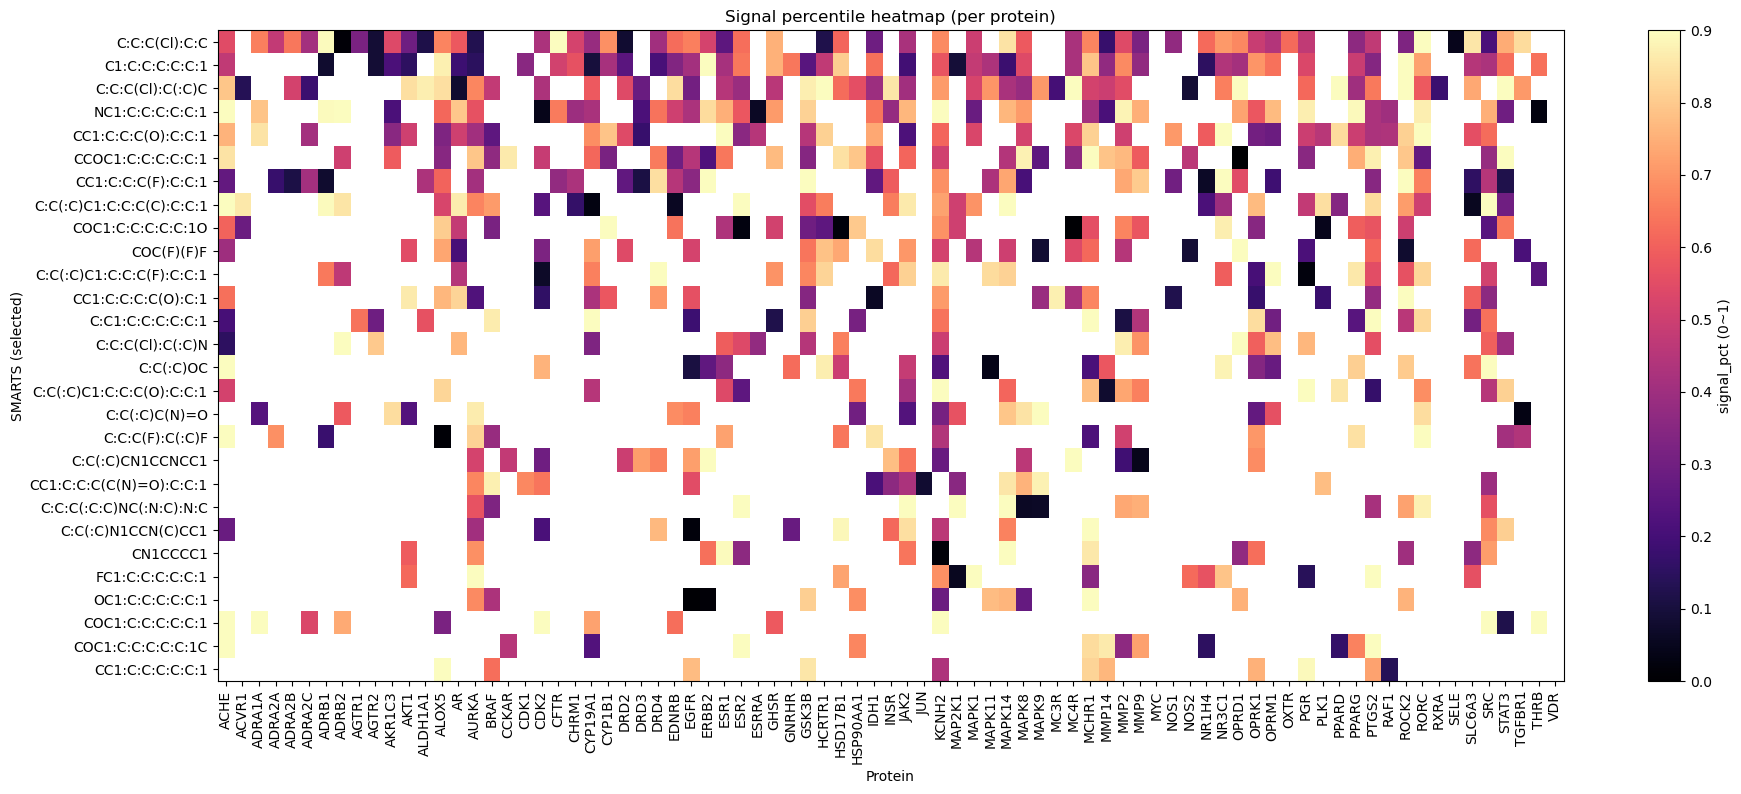

,C:C:C(Cl):C:C,C1:C:C:C:C:C:1,C:C:C(Cl):C(:C)C,NC1:C:C:C:C:C:1,CC1:C:C:C(O):C:C:1,CCOC1:C:C:C:C:C:1,CC1:C:C:C(F):C:C:1,C:C(:C)C1:C:C:C(C):C:C:1,COC1:C:C:C:C:C:1O,COC(F)(F)F,...,C:C(:C)CN1CCNCC1,CC1:C:C:C(C(N)=O):C:C:1,C:C:C(:C:C)NC(:N:C):N:C,C:C(:C)N1CCN(C)CC1,CN1CCCC1,FC1:C:C:C:C:C:1,OC1:C:C:C:C:C:1,COC1:C:C:C:C:C:1,COC1:C:C:C:C:C:1C,CC1:C:C:C:C:C:1
ACHE,0.546291,0.473836,0.792409,0.898792,0.756182,0.848764,0.267970,0.901668,0.605520,0.400230,...,0.0,0.000000,0.00000,0.282921,0.000000,0.0,0.0,0.925244,0.924669,0.0
ACVR1,0.000000,0.000000,0.136646,0.000000,0.000000,0.000000,0.000000,0.860248,0.285714,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
ADRA1A,0.660377,0.000000,0.000000,0.787736,0.849057,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.948113,0.000000,0.0
ADRA2A,0.475728,0.000000,0.000000,0.000000,0.000000,0.000000,0.174757,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
ADRA2B,0.646667,0.000000,0.513333,0.000000,0.000000,0.000000,0.113333,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRC,0.212088,0.428571,0.000000,0.749451,0.625275,0.382418,0.447802,0.949451,0.243407,0.000000,...,0.0,0.396703,0.56044,0.680769,0.714286,0.0,0.0,0.939011,0.000000,0.0
STAT3,0.745014,0.626781,0.998575,0.296296,0.000000,0.915954,0.122507,0.296296,0.645299,0.000000,...,0.0,0.000000,0.00000,0.809117,0.000000,0.0,0.0,0.122507,0.000000,0.0
TGFBR1,0.833333,0.000000,0.708333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212798,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
THRB,0.000000,0.633333,0.000000,0.026667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.923333,0.000000,0.0


In [4]:
df_new = pd.read_csv('filter_matrix.csv',index_col=0)
plot_heatmap(list(df_new.index),list(df_matrix.columns),df_new.values,'热图_filter.svg')